In [79]:
# Configuração para não exibir os warnings
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor  # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC, SVR # algoritmo SVM
from sklearn.neural_network import MLPRegressor


warnings.filterwarnings("ignore")
np.set_printoptions(suppress=True)


In [66]:
# Carregar o conjunto de dados do arquivo Excel
data = pd.read_excel('BaseFadiga - corrigida.xlsx')
data = pd.DataFrame(data)
data.drop(columns=['ID mistura'], inplace=True)

# Verificar o tamanho do conjunto de dados
n_linhas, n_colunas = data.shape
print(f"Número de linhas: {n_linhas}")
print(f"Número de colunas: {n_colunas}")

# Identificar o tipo de cada variável
display(data.info())

# Analisar estatísticas descritivas básicas para variáveis numéricas
print("Estatísticas descritivas básicas para variáveis numéricas:")
display(data.describe())

# Verificar a presença de valores ausentes ou dados inconsistentes
valores_ausentes = data.isnull().sum()
print("Valores ausentes por coluna:")
print(valores_ausentes)


Número de linhas: 89
Número de colunas: 14
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VB135   86 non-null     float64
 1   p200    89 non-null     float64
 2   p4      89 non-null     float64
 3   p38     89 non-null     float64
 4   p34     89 non-null     float64
 5   Teor    89 non-null     float64
 6   VMA     88 non-null     float64
 7   VFA     89 non-null     float64
 8   C11     89 non-null     float64
 9   C12     89 non-null     float64
 10  Gamma   89 non-null     int64  
 11  Delta   89 non-null     float64
 12  Alpha   89 non-null     float64
 13  Classe  89 non-null     int64  
dtypes: float64(12), int64(2)
memory usage: 9.9 KB


None

Estatísticas descritivas básicas para variáveis numéricas:


,VB135,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
count,86.000000,89.000000,89.000000,89.000000,89.000000,89.000000,88.000000,89.000000,89.000000,89.000000,8.900000e+01,89.000000,89.000000,89.000000
mean,882.168023,0.051554,0.487591,0.218623,0.015844,0.049891,0.153731,0.735174,0.000616,0.681640,1.527627e+09,-1.367416,3.262225,1.977528
std,662.393042,0.011766,0.071263,0.097850,0.026569,0.007027,0.012171,0.030344,0.001068,0.124059,1.303462e+10,0.224156,0.333053,0.768374
min,304.700000,0.032000,0.253520,0.017455,0.000000,0.036500,0.131300,0.645600,0.000002,0.406000,4.700000e+04,-2.342000,2.600000,1.000000
25%,389.600000,0.042000,0.456300,0.145600,0.000000,0.045000,0.146600,0.725000,0.000139,0.602000,3.000000e+06,-1.436000,3.030000,1.000000
50%,586.250000,0.054000,0.500000,0.208000,0.006000,0.050000,0.152000,0.740000,0.000246,0.685000,7.570000e+06,-1.340000,3.194000,2.000000
75%,1040.000000,0.058700,0.540000,0.295000,0.015600,0.055000,0.162000,0.749800,0.000627,0.752000,2.020000e+07,-1.234000,3.560000,3.000000
max,4380.000000,0.085231,0.617262,0.464000,0.167271,0.073000,0.192000,0.870000,0.006330,1.080000,1.230000e+11,-0.818000,4.341000,3.000000


Valores ausentes por coluna:
VB135     3
p200      0
p4        0
p38       0
p34       0
Teor      0
VMA       1
VFA       0
C11       0
C12       0
Gamma     0
Delta     0
Alpha     0
Classe    0
dtype: int64


In [67]:
data.dropna(inplace=True)

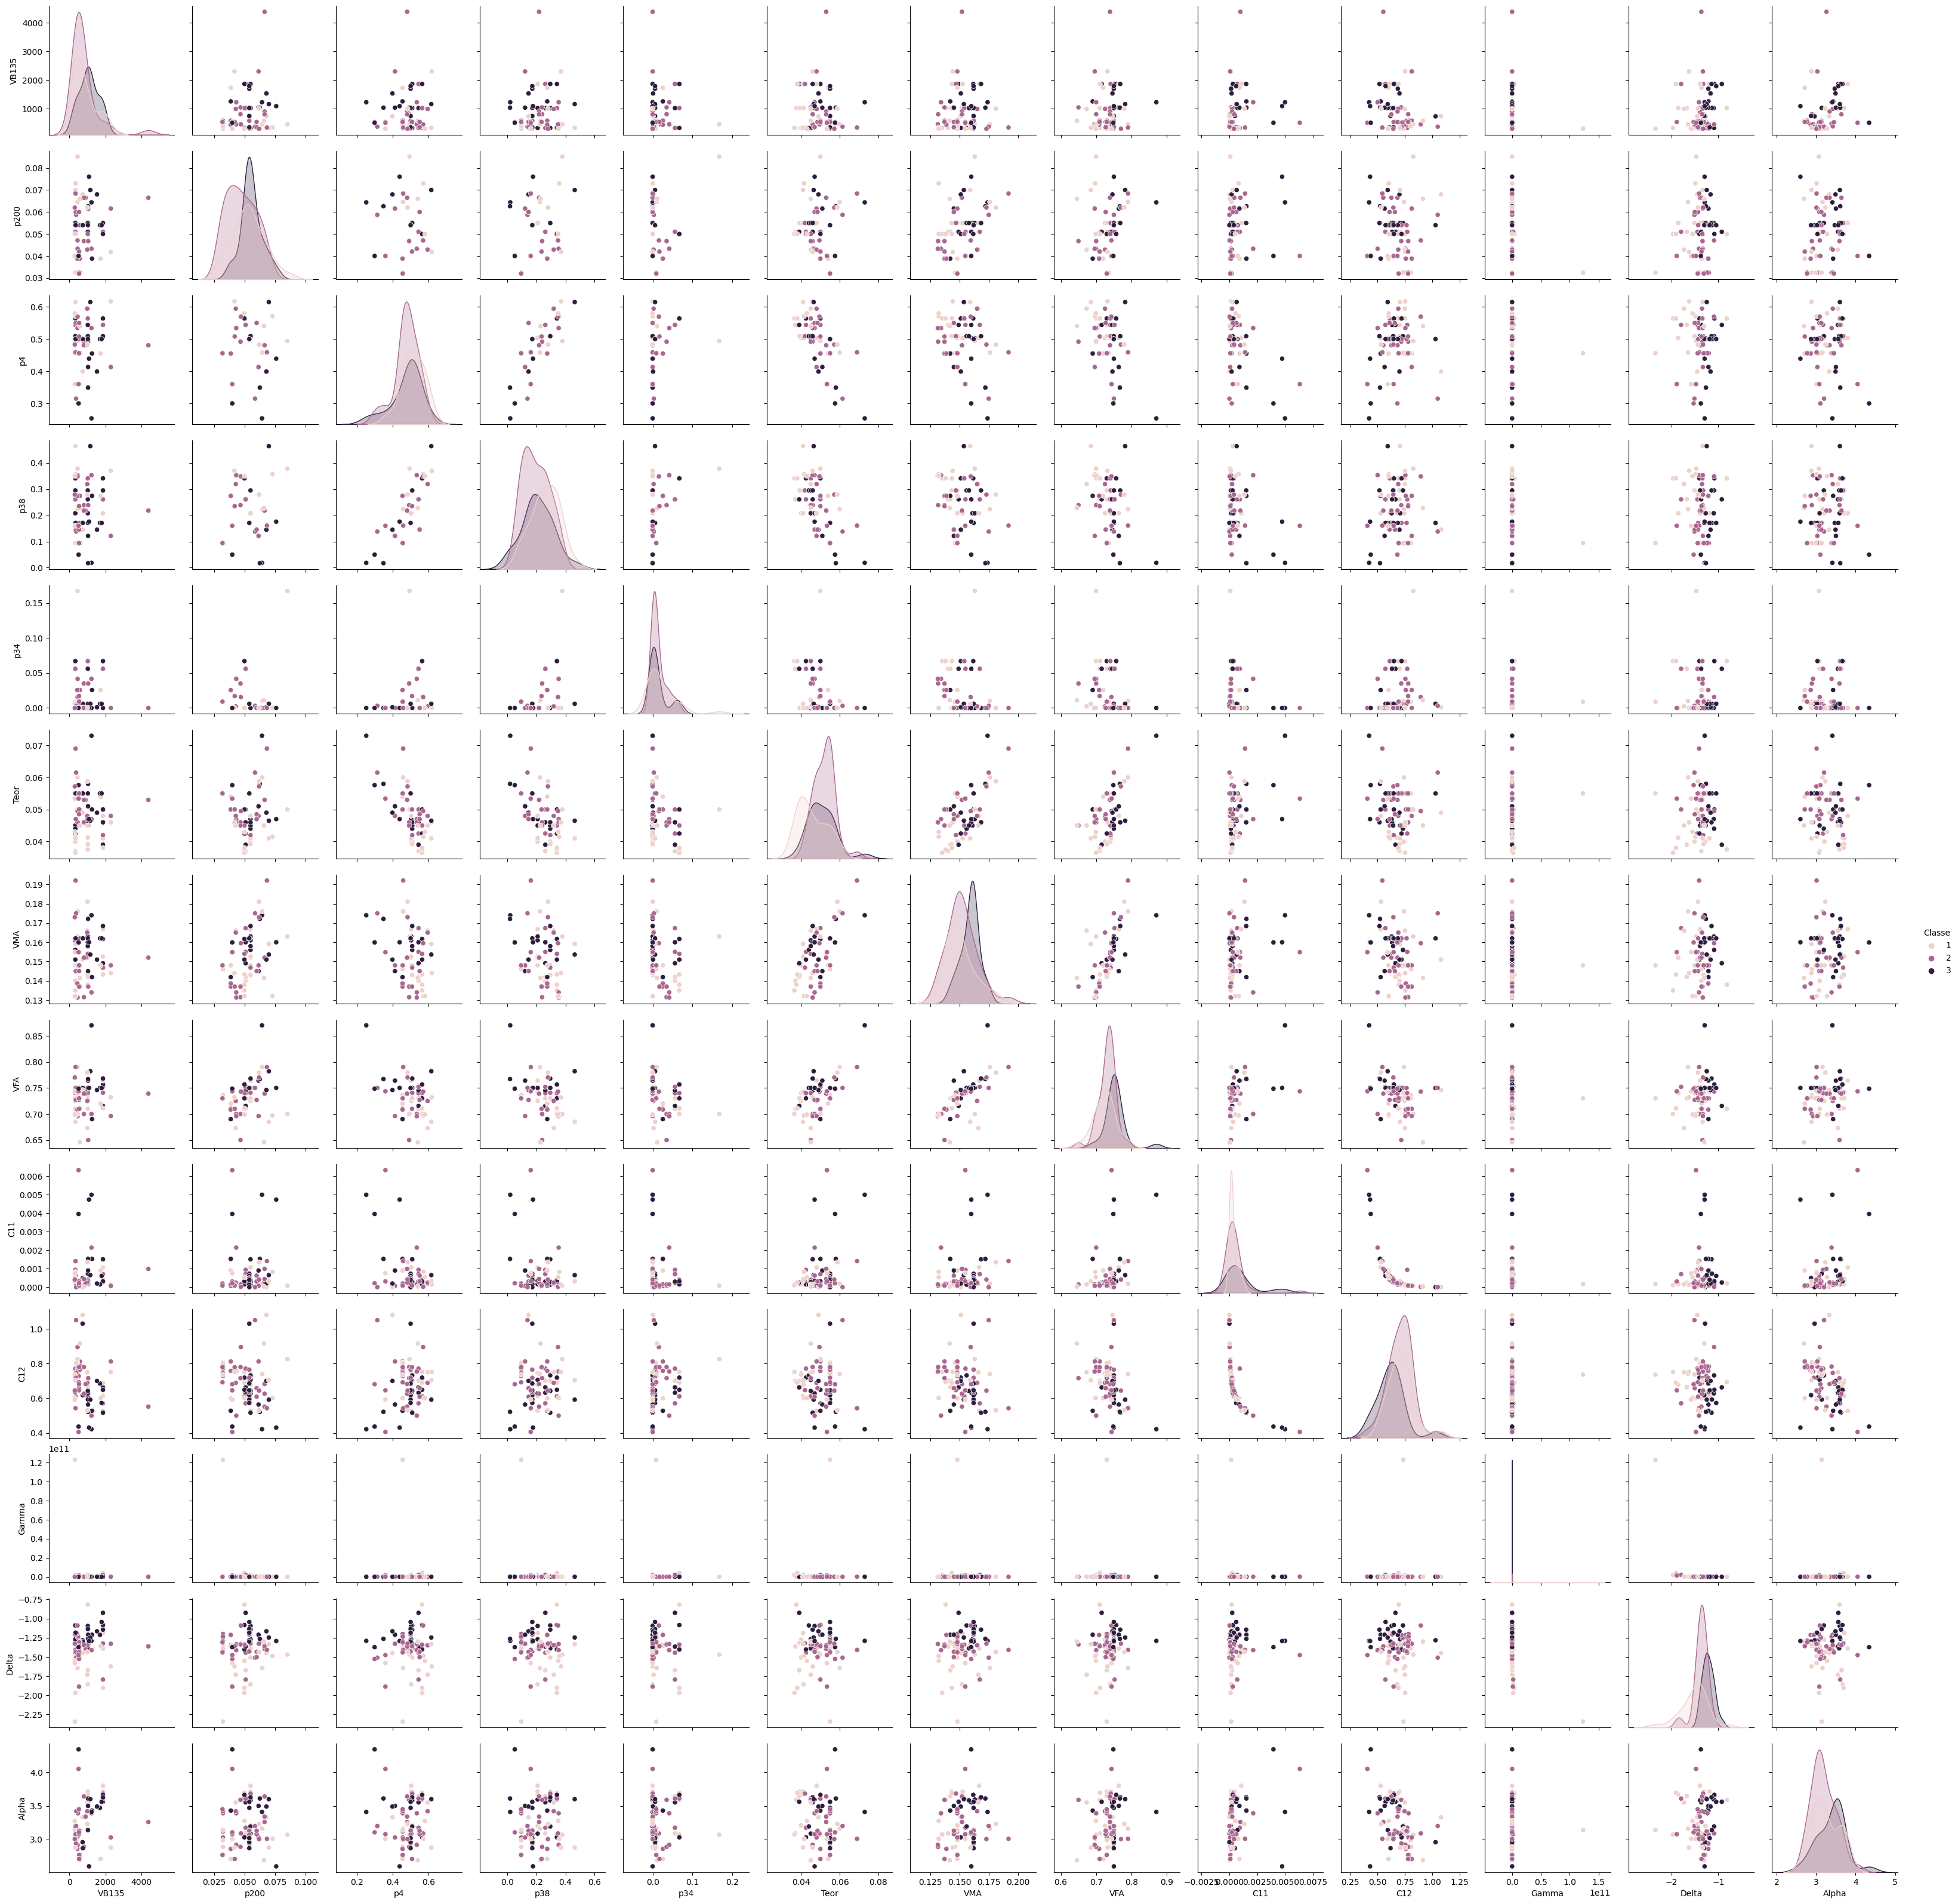

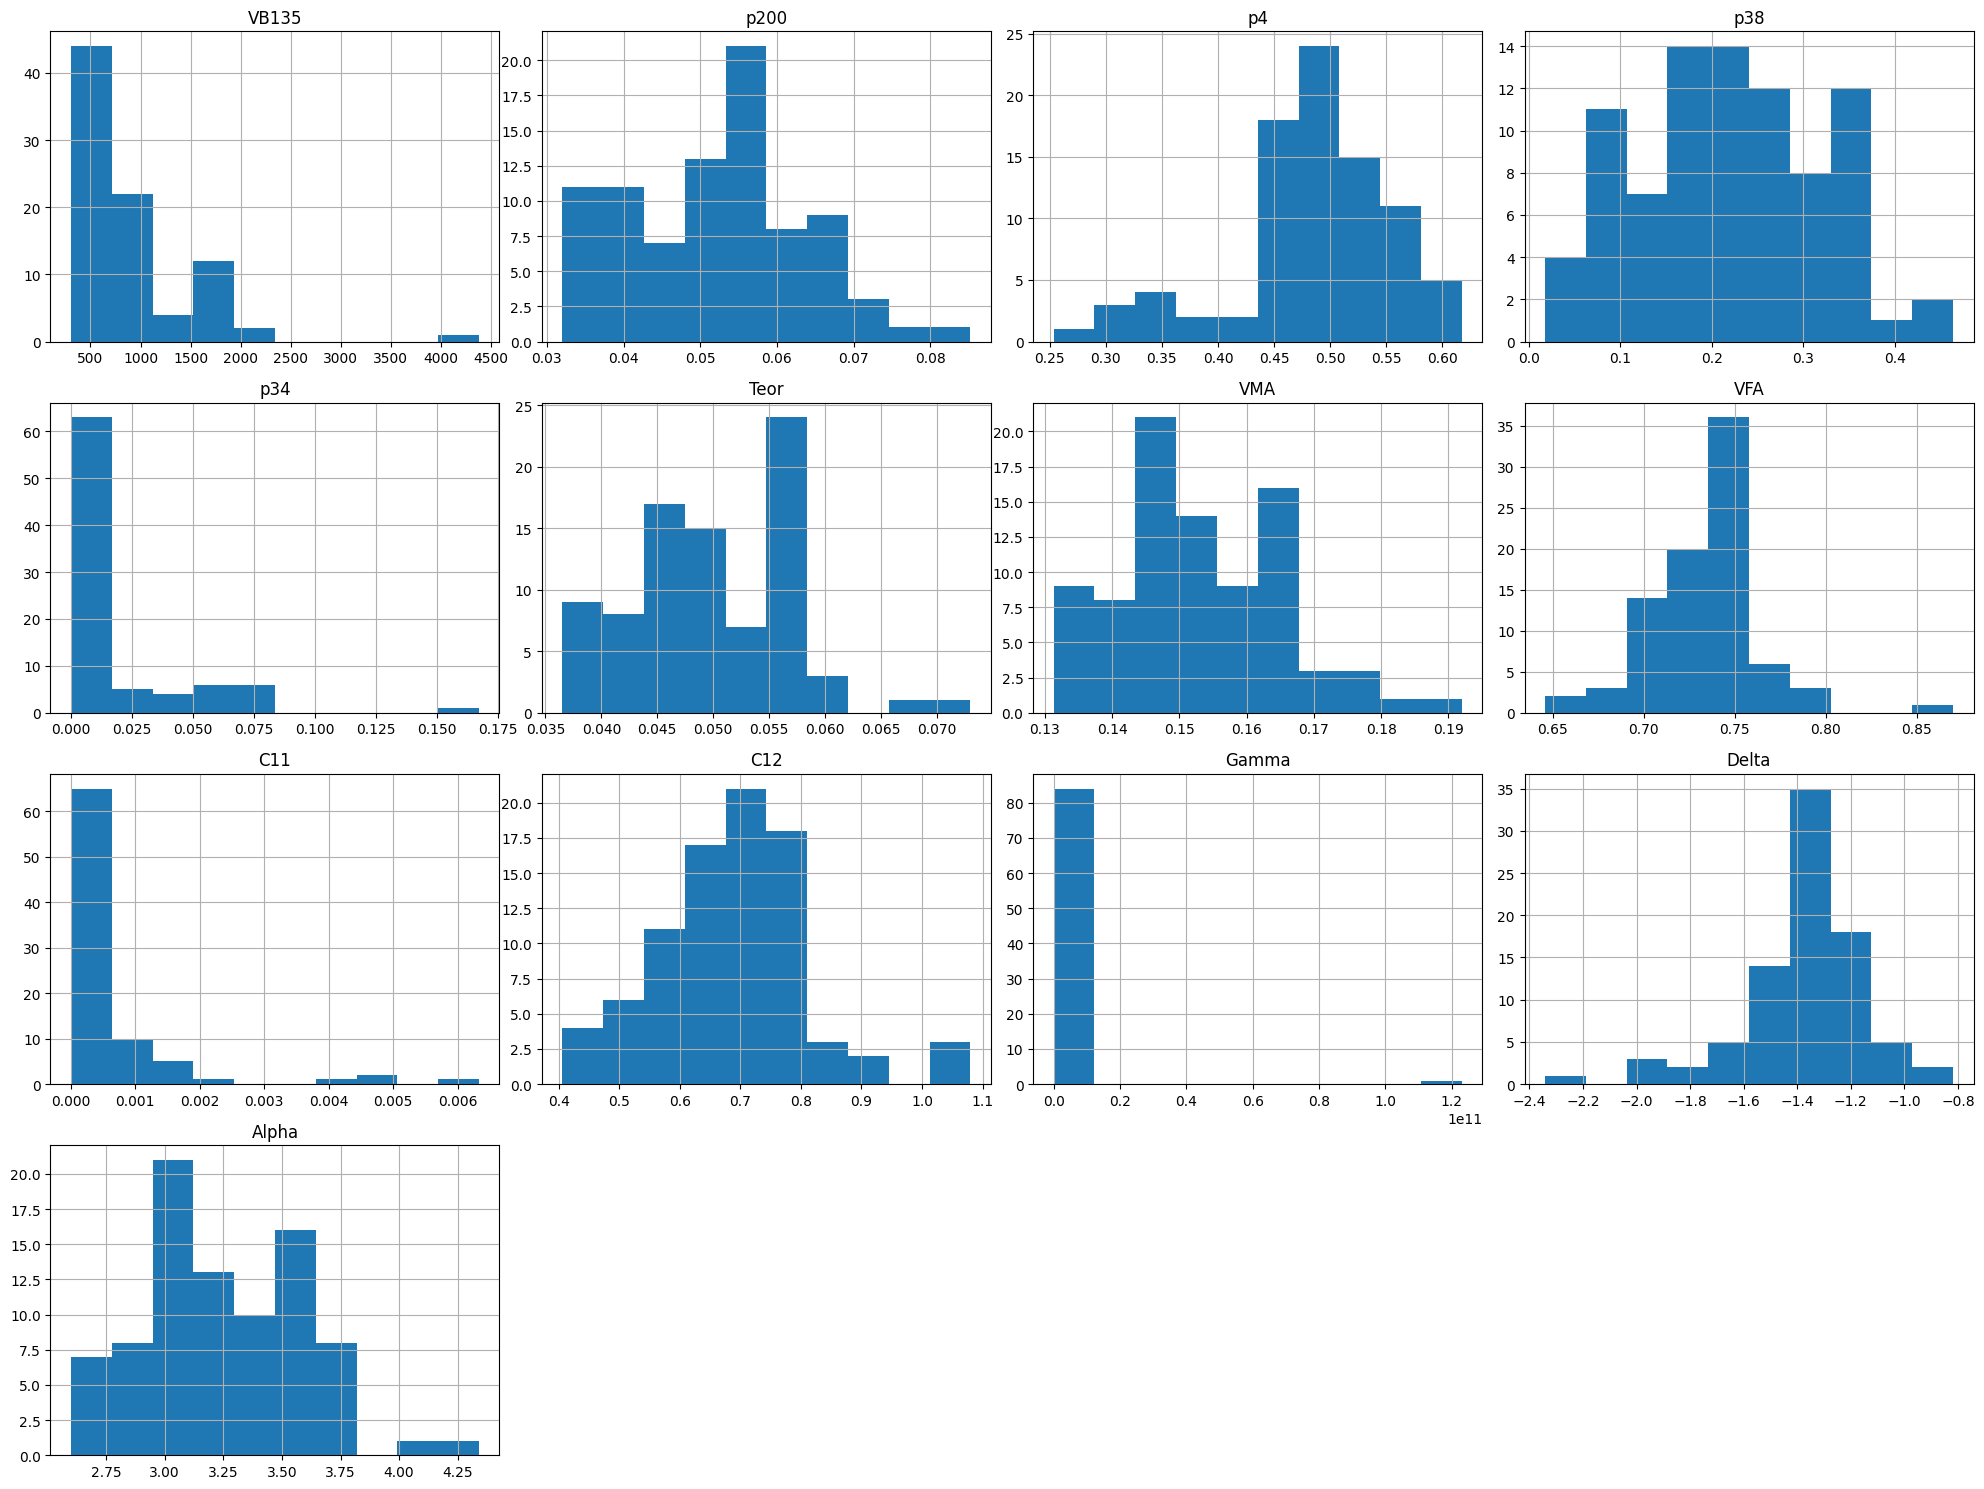

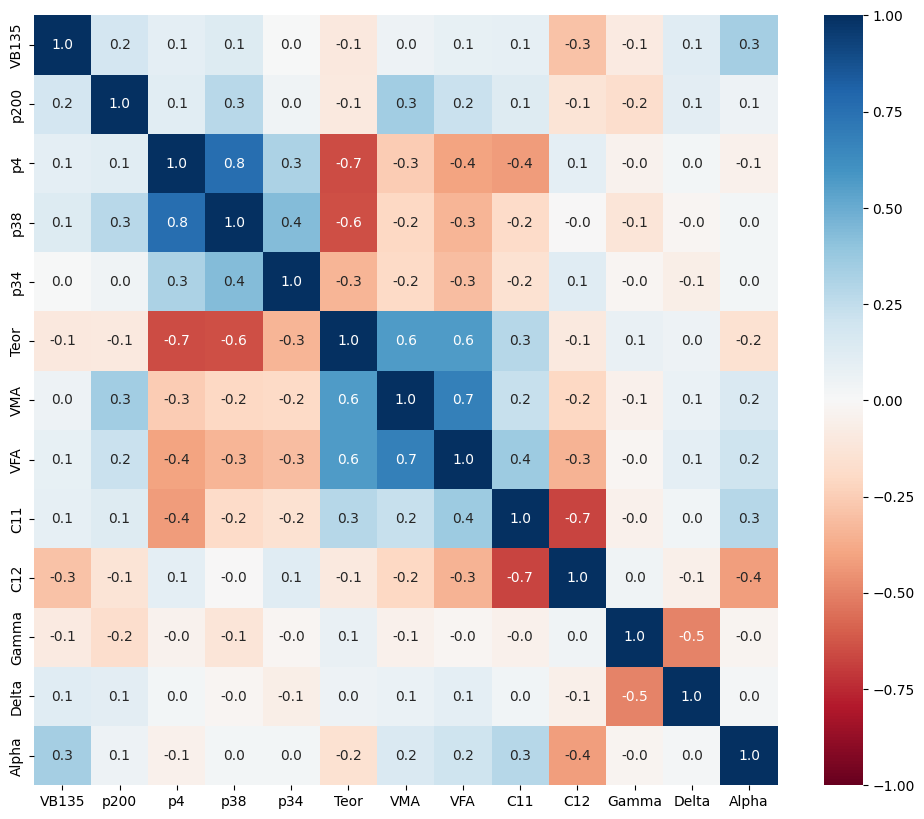

In [69]:
# Plotar gráficos de dispersão para as variáveis numéricas
variaveis_numericas = ['VB135', 'p200', 'p4', 'p38', 'p34', 'Teor', 'VMA',
                        'VFA', 'C11', 'C12', 'Gamma', 'Delta', 'Alpha']
sns.pairplot(data, hue = "Classe")

# pair plot 2 com Seaborn


#Visualizar a distribuição das variáveis numéricas usando histogramas
data[variaveis_numericas].hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

# Identificar correlações entre as variáveis
plt.figure(figsize=(12, 10))
correlacoes = data.drop(columns=['Classe'])
correlacoes = correlacoes.corr()
sns.heatmap(correlacoes, annot=True, fmt=".1f",  cmap='RdBu', vmin=-1, vmax=1)

plt.show()


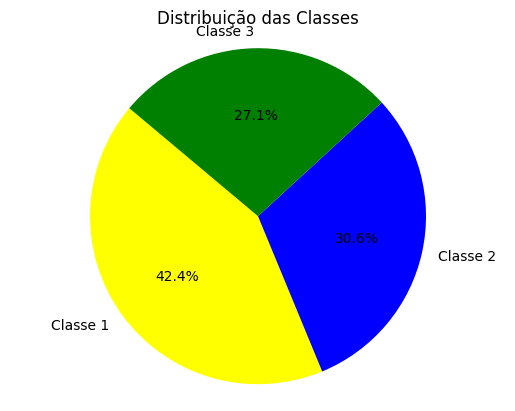

In [70]:
# Contar a quantidade de ocorrências de cada valor na coluna "Classe"
count_values = data['Classe'].value_counts()

# Criar o gráfico de pizza
labels = ['Classe 1', 'Classe 2', 'Classe 3']
colors = ['yellow', 'blue', 'green']
plt.pie(count_values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Adicionar um título ao gráfico
plt.title('Distribuição das Classes')

# Mostrar o gráfico
plt.axis('equal')  # Faz o gráfico de pizza ser desenhado como um círculo.
plt.show()

In [71]:
# Codificar variável categóricas
# Normalizar as variáveis numéricas
variaveis_numericas = ['VB135', 'p200', 'p4', 'p38', 'p34', 'Teor', 'VMA',
                        'VFA', 'C11', 'C12', 'Gamma', 'Delta', 'Alpha']

scaler = StandardScaler()
data[variaveis_numericas] = scaler.fit_transform(data[variaveis_numericas])

# Visualizar o conjunto de dados após o pré-processamento
data.reset_index(inplace=True)
data.drop(columns=['index'], inplace=True)
display(data)

,VB135,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
0,-0.840429,-0.036229,0.777087,0.419623,1.473377,-1.835873,-1.111508,-0.817708,-0.394188,0.135719,-0.119124,0.041970,-0.501660,1
1,-0.840429,-0.121149,1.055528,1.231288,1.881818,-1.908031,-1.531649,-1.147572,-0.464705,0.545713,0.030217,-2.634709,-0.546495,1
2,-0.840429,0.303450,0.206281,-0.118106,-0.605961,-1.402924,-0.439281,-0.322911,-0.454499,0.481400,-0.120255,0.431949,-0.166892,1
3,-0.840429,0.303450,0.289813,0.764580,-0.605961,-1.402924,-0.439281,0.171886,-0.409961,0.425126,-0.117615,-0.596179,-0.137002,1
4,0.207647,-0.036229,0.777087,0.419623,1.473377,-1.547241,-0.943451,-0.157978,-0.342227,-0.161728,-0.105547,-1.331822,1.157236,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,-0.528278,-0.970346,-2.619904,-1.721145,-0.605961,1.137043,0.560537,0.453676,-0.367279,-0.025063,-0.118716,-0.680379,-0.453836,2
81,-0.567202,-0.970346,-1.784578,-0.605105,-0.605961,0.530914,0.135943,0.288457,5.308473,-2.235814,-0.112788,-0.454368,2.367781,2
82,-0.567202,-0.970346,-2.619904,-1.721145,-0.605961,1.137043,0.560537,0.453676,3.109432,-1.986602,-0.119410,0.002085,3.237581,3
83,-0.883291,0.897889,-0.072161,0.602247,-0.605961,1.079316,1.661428,1.161480,-0.180779,-0.322510,-0.120200,0.205938,-0.752736,2


In [73]:
variaveis_entradas = ['VB135', 'p200', 'p4', 'p38', 'p34', 'Teor', 'VMA',
                        'VFA']

variaveis_saida = ['C11',	'C12',	'Gamma',	'Delta',	'Alpha']
X = data[variaveis_entradas]

for var in variaveis_saida:

    y = data[var]

    # Divida os dados em conjunto de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor()),
    ("Gradient Boosting", GradientBoostingRegressor()),
    ("AdaBoost", AdaBoostRegressor()),
    ("K-Nearest Neighbors", KNeighborsRegressor()),
    ("SVR", SVR()),
    ("Neural Network", MLPRegressor())
]

    # Teste e avalie cada modelo
    for name, model in models:
        # Realize a validação cruzada para avaliar o modelo de forma mais robusta
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        cv_rmse = np.sqrt(-cv_scores)
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        print(f"Variavel: {var}")
        print(f"Model: {name}")
        print(f"Cross-validated RMSE: {cv_rmse.mean():.2f} (+/- {cv_rmse.std():.2f})")
        print(f"Mean Squared Error: {mse:.2f}")
        print(f"Mean Absolute Error: {mae:.2f}")
        print(f"R-squared: {r2:.2f}")
        print("="*50)

Variavel: C11
Model: Linear Regression
Cross-validated RMSE: 0.81 (+/- 0.56)
Mean Squared Error: 0.96
Mean Absolute Error: 0.58
R-squared: 0.37
Variavel: C11
Model: Ridge Regression
Cross-validated RMSE: 0.80 (+/- 0.57)
Mean Squared Error: 0.97
Mean Absolute Error: 0.58
R-squared: 0.36
Variavel: C11
Model: Lasso Regression
Cross-validated RMSE: 0.80 (+/- 0.50)
Mean Squared Error: 1.69
Mean Absolute Error: 0.66
R-squared: -0.11
Variavel: C11
Model: Decision Tree
Cross-validated RMSE: 1.43 (+/- 0.47)
Mean Squared Error: 3.15
Mean Absolute Error: 1.02
R-squared: -1.07
Variavel: C11
Model: Random Forest
Cross-validated RMSE: 1.07 (+/- 0.47)
Mean Squared Error: 1.80
Mean Absolute Error: 0.73
R-squared: -0.18
Variavel: C11
Model: Gradient Boosting
Cross-validated RMSE: 1.39 (+/- 0.50)
Mean Squared Error: 1.65
Mean Absolute Error: 0.62
R-squared: -0.08
Variavel: C11
Model: AdaBoost
Cross-validated RMSE: 1.24 (+/- 0.61)
Mean Squared Error: 2.68
Mean Absolute Error: 0.83
R-squared: -0.76
Variav

In [74]:
#Separação em bases de treino e teste (holdout)
array = data.values
X = array[:,0:8] # atributos
y = array[:,13] # classe (target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7) # faz a divisão

# Definindo a métrica de avaliação dos algoritmos
scoring = 'accuracy'

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

KNN: 0.626190 (0.140476)
CART: 0.666667 (0.169700)
NB: 0.550000 (0.135296)
SVM: 0.619048 (0.128218)


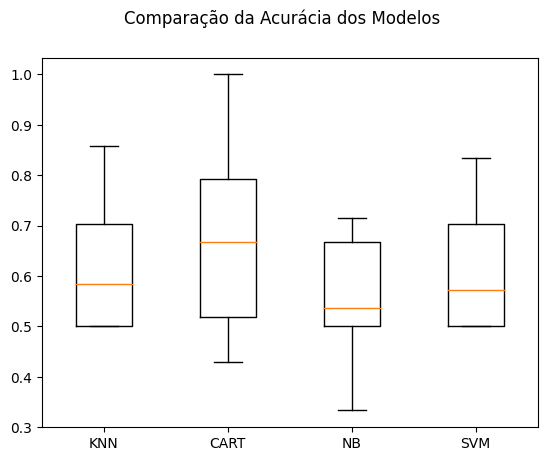

In [75]:
# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure() 
fig.suptitle('Comparação da Acurácia dos Modelos') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

LR: MSE 1.21 (1.06) - RMSE 1.10 - R² -8.79
Ridge: MSE 1.18 (1.06) - RMSE 1.08 - R² -7.92
Lasso: MSE 1.04 (1.27) - RMSE 1.02 - R² -1.17
KNN: MSE 1.10 (1.09) - RMSE 1.05 - R² -5.30
CART: MSE 2.57 (1.37) - RMSE 1.60 - R² -18.82
SVM: MSE 1.14 (1.32) - RMSE 1.07 - R² -1.67


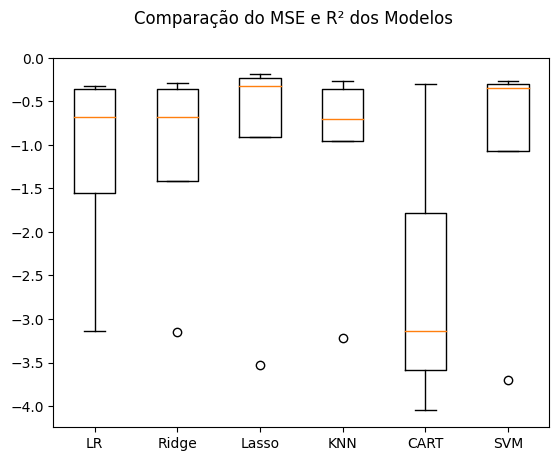

LR: MSE 1.36 (0.86) - RMSE 1.17 - R² -0.57
Ridge: MSE 1.33 (0.83) - RMSE 1.15 - R² -0.52
Lasso: MSE 1.08 (0.49) - RMSE 1.04 - R² -0.24
KNN: MSE 1.35 (0.72) - RMSE 1.16 - R² -0.52
CART: MSE 1.30 (0.57) - RMSE 1.14 - R² -0.75
SVM: MSE 1.20 (0.74) - RMSE 1.10 - R² -0.32


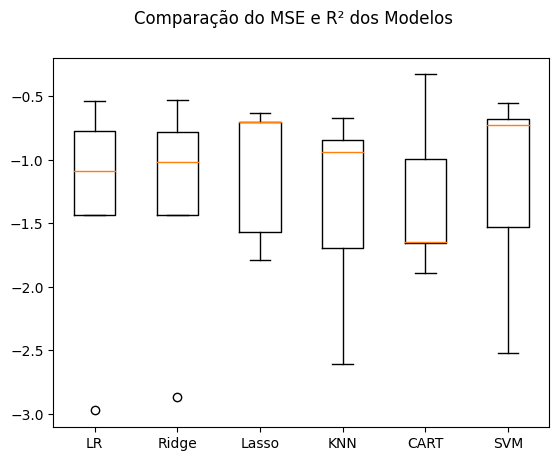

LR: MSE 1.34 (2.41) - RMSE 1.16 - R² -2817.07
Ridge: MSE 1.34 (2.41) - RMSE 1.16 - R² -2571.80
Lasso: MSE 1.25 (2.44) - RMSE 1.12 - R² -445.44
KNN: MSE 1.28 (2.44) - RMSE 1.13 - R² -20.05
CART: MSE 1.23 (2.46) - RMSE 1.11 - R² -21.01
SVM: MSE 1.21 (2.41) - RMSE 1.10 - R² -90.98


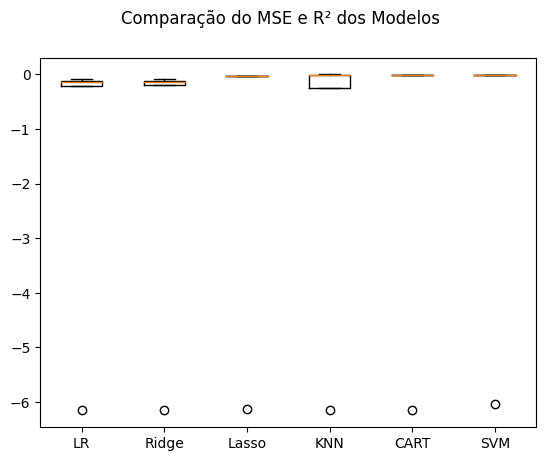

LR: MSE 1.36 (0.55) - RMSE 1.17 - R² -0.49
Ridge: MSE 1.33 (0.53) - RMSE 1.15 - R² -0.44
Lasso: MSE 1.12 (0.48) - RMSE 1.06 - R² -0.06
KNN: MSE 1.25 (0.65) - RMSE 1.12 - R² -0.17
CART: MSE 2.75 (1.17) - RMSE 1.66 - R² -1.73
SVM: MSE 1.26 (0.63) - RMSE 1.12 - R² -0.17


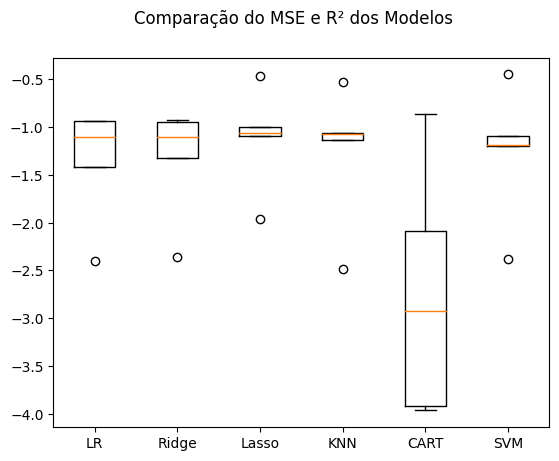

LR: MSE 1.22 (0.47) - RMSE 1.10 - R² -0.24
Ridge: MSE 1.19 (0.46) - RMSE 1.09 - R² -0.19
Lasso: MSE 1.14 (0.53) - RMSE 1.07 - R² -0.07
KNN: MSE 0.94 (0.36) - RMSE 0.97 - R² 0.05
CART: MSE 1.53 (0.61) - RMSE 1.24 - R² -0.84
SVM: MSE 0.96 (0.54) - RMSE 0.98 - R² 0.14


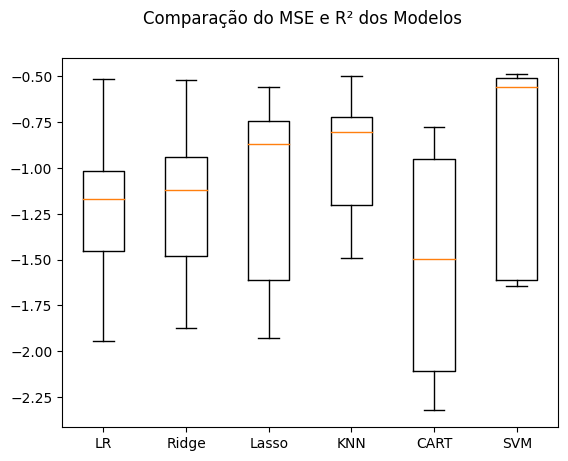

In [76]:
# Separação em bases de treino e teste (holdout)
array = data.values
X = array[:, 0:8]  # atributos
for i in [8, 9, 10, 11, 12]:
    y = array[:, i]  # classe (target)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)  # faz a divisão

    # Criando os folds para a validação cruzada
    num_particoes = 5  # número de folds da validação cruzada
    kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7)  # faz o particionamento em 10 folds

    # Modelagem

    # Definindo uma seed global para esta célula de código
    np.random.seed(7)

    # Listas para armazenar os modelos, os resultados e os nomes dos modelos
    models = []
    results = []
    r2_scores = []
    names = []

    # Preparando os modelos e adicionando-os em uma lista
    models.append(('LR', LinearRegression()))
    models.append(('Ridge', Ridge()))
    models.append(('Lasso', Lasso()))
    models.append(('KNN', KNeighborsRegressor()))
    models.append(('CART', DecisionTreeRegressor()))
    models.append(('SVM', SVR()))

    # Avaliando um modelo por vez
    for name, model in models:
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
        r2_cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
        results.append(cv_results)
        r2_scores.append(r2_cv_results)
        names.append(name)
        # imprime MSE, desvio padrão do MSE, RMSE e R² dos 10 resultados da validação cruzada
        msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f - R² %0.2f" % (
            name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())), r2_cv_results.mean()
        )
        print(msg)

    # Boxplot de comparação dos modelos
    fig, ax = plt.subplots()
    fig.suptitle('Comparação do MSE e R² dos Modelos')
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()
